<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Text Detection Using OCR

This Code Template is for text Detection using OpenCV and the easyocr for Optical Character Recognition in an image file.

### Required packages

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy
!pip install easyocr

In [2]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

### Initialization

Path of the image to be loaded

In [3]:
im_1_path = ''
im_2_path = ''
im_3_path = ''
im_4_path = ''
im_5_path = ''

#### EasyOCR 
EasyOCR optical character recognition library reads short texts (such as serial numbers, part numbers and dates).

It uses font files (pre-defined OCR-A, OCR-B and Semi standard fonts, or other learned fonts ) with a template matching algorithm that can recognize even badly printed, broken or connected characters of any size.

In [4]:
def recognize_text(img_path):
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [5]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'/content/{save_name}_overlay.jpg', bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Detected text: CCC 444 (Probability: 0.57)


<Figure size 432x288 with 0 Axes>

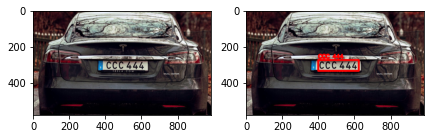

In [6]:
overlay_ocr_text(im_1_path, '1_carplate')

Detected text: Nol (Probability: 0.99)
Detected text: Offense (Probability: 1.00)
Detected text: Before (Probability: 0.69)
Detected text: Offensive (Probability: 0.93)
Detected text: Stop (Probability: 1.00)
Detected text: Saying (Probability: 0.92)
Detected text: Sorething (Probability: 0.79)


<Figure size 432x288 with 0 Axes>

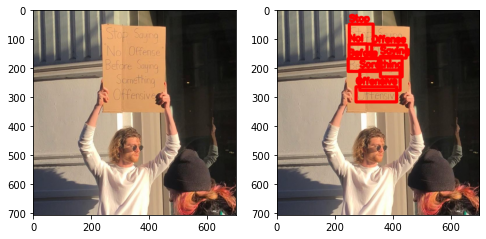

In [7]:
overlay_ocr_text(im_2_path, '2_handwriting')

Detected text: 224 LIVES (Probability: 0.83)
Detected text: S11.6 BILLION (Probability: 0.78)
Detected text: 186 AIRCRAFT (Probability: 1.00)


<Figure size 432x288 with 0 Axes>

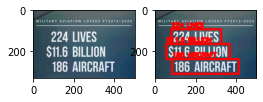

In [8]:
overlay_ocr_text(im_3_path, '3_digits')

Detected text: Your Address (Probability: 1.00)
Detected text: INVOICE (Probability: 1.00)
Detected text: your@email.com (Probability: 0.69)
Detected text: State, Country (Probability: 0.85)
Detected text: yourwebsite com (Probability: 0.93)
Detected text: ZIP CODE (Probability: 1.00)
Detected text: Billed To (Probability: 1.00)
Detected text: Invoice Number (Probability: 0.98)
Detected text: Invoice Total (Probability: 1.00)
Detected text: Client Name (Probability: 0.88)
Detected text: Oooooo (Probability: 0.65)
Detected text: 1 Client Address (Probability: 1.00)
Detected text: S4520.00 (Probability: 0.77)
Detected text: City; State, Country (Probability: 0.87)
Detected text: Date Of Issue (Probability: 0.75)
Detected text: ZIP CODE (Probability: 0.88)
Detected text: 10/07/14 (Probability: 0.69)
Detected text: Description (Probability: 1.00)
Detected text: Unit Cost (Probability: 1.00)
Detected text: Qty (Probability: 0.96)
Detected text: Hr Rate (Probability: 0.87)
Detected text: Amo

<Figure size 432x288 with 0 Axes>

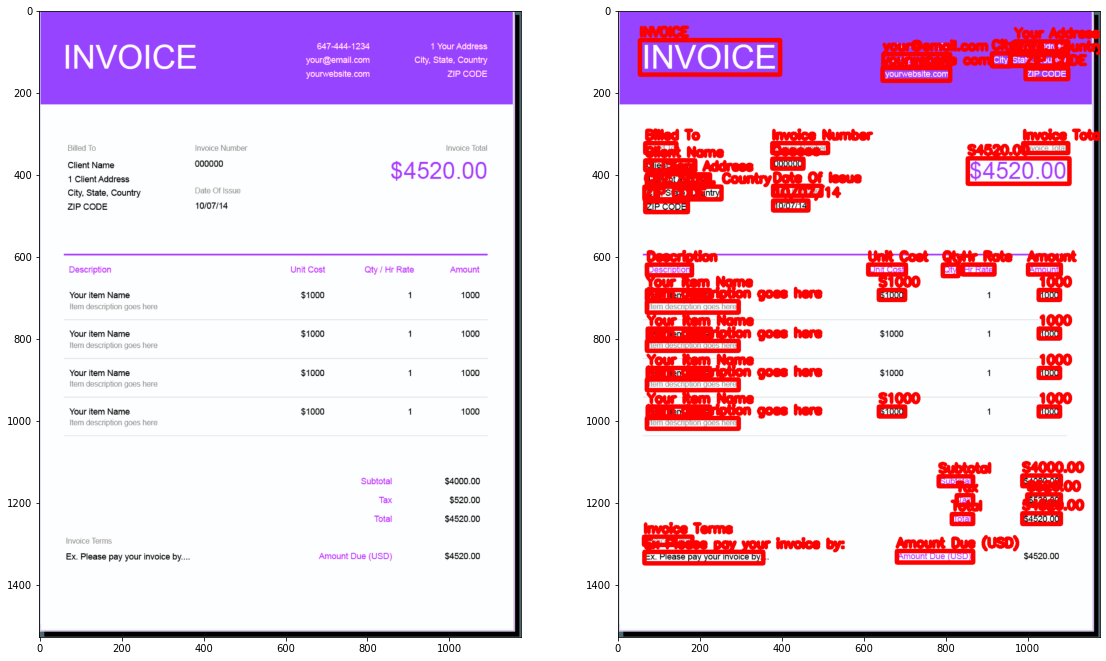

In [9]:
overlay_ocr_text(im_4_path, '4_invoice')

Detected text: NOTICE (Probability: 1.00)
Detected text: THANK (Probability: 0.60)
Detected text: YOU (Probability: 0.98)
Detected text: FOR (Probability: 1.00)
Detected text: NOTICING (Probability: 1.00)
Detected text: THIS (Probability: 1.00)
Detected text: NEW (Probability: 1.00)
Detected text: NOTICE (Probability: 1.00)
Detected text: YOUR (Probability: 1.00)
Detected text: NOTICING (Probability: 1.00)
Detected text: IT (Probability: 0.97)
Detected text: HAS (Probability: 1.00)
Detected text: BEEN (Probability: 1.00)
Detected text: NOTED (Probability: 0.99)
Detected text: AND WILL BE REPORTED TO THE AUTHORITIES (Probability: 0.71)


<Figure size 432x288 with 0 Axes>

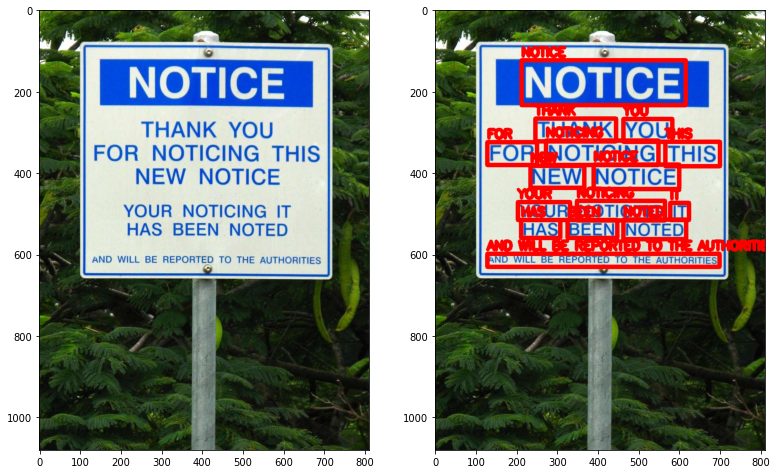

In [10]:
overlay_ocr_text(im_5_path, '5_roadsign')

#### Creator: Ganapathi Thota , Github: [Profile](https://github.com/Shikiz)